<a href="https://colab.research.google.com/github/proteus21/DATA-SCIENCE-STUDY/blob/main/Machine%20Learning/02_regression/07_regression_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##To install scikit-learn library use command below

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:

**!pip install scikit-learn**

In order to update to newest scikit-learn library, use command below

Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:

**!pip install --upgrade scikit-learn**

### Contenst:
1. [Import library](#0)
2. [Graph interpretation](#1)
3. [Mean Absolute Error - MAE ](#2)
4. [Mean Squared Error - MSE](#3)
5. [Root Mean Squared Error - RMSE](#4)
6. [Max Error](#5)
7. [R2 scor](#6)



### Spis treści:
1. [Import bibliotek](#a0)
2. [Interpretacja graficzna](#a2)
3. [Mean Absolute Error - MAE - Średni błąd bezwzględny](#a3)
4. [Mean Squared Error - MSE - Błąd średniokwadratowy](#a4)
5. [Root Mean Squared Error - RMSE - Pierwiastek błędu średniokwadratowego](#a5)
6. [Max Error - Błąd maksymalny](#a6)
7. [R2 score - współczynnik determinacji](#a7)




---
### <a name='0'></a> Import bibliotek / Import library




In [18]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
np.random.seed(42)
import matplotlib.pyplot as plt


In [4]:
y_true=100+20*np.random.randn(50)
y_true

array([109.93428306,  97.23471398, 112.95377076, 130.46059713,
        95.31693251,  95.31726086, 131.58425631, 115.34869458,
        90.61051228, 110.85120087,  90.73164614,  90.68540493,
       104.83924543,  61.73439511,  65.50164335,  88.75424942,
        79.74337759, 106.28494665,  81.83951849,  71.75392597,
       129.31297538,  95.48447399, 101.35056409,  71.50503628,
        89.11234551, 102.21845179,  76.98012845, 107.51396037,
        87.9872262 ,  94.166125  ,  87.96586776, 137.04556369,
        99.73005551,  78.84578142, 116.45089824,  75.583127  ,
       104.1772719 ,  60.80659752,  73.43627902, 103.93722472,
       114.7693316 , 103.42736562,  97.68703435,  93.97792609,
        70.42956019,  85.60311583,  90.78722458, 121.14244452,
       106.87236579,  64.73919689])

In [5]:
y_pred=y_true+10*np.random.randn(50)
y_pred

array([113.17512275,  93.38389117, 106.18455076, 136.57736002,
       105.62692773, 104.63006205, 123.19208108, 112.25657082,
        93.9231466 , 120.60665214,  85.93990377,  88.82881516,
        93.77589569,  49.77232887,  73.62690157, 102.3166497 ,
        79.02327638, 116.32027563,  85.45587874,  65.30272843,
       132.92693143, 110.86483965, 100.9923037 ,  87.15147283,
        62.91489447, 110.43747684,  77.85059913, 104.52388686,
        88.90483397,  74.29043586,  85.76914888, 140.61668941,
       114.50899595,  73.66307924, 108.36596221,  70.56555656,
       113.33129308,  64.09410862,  68.13867698, 109.06989905,
       115.74010709, 113.11381553,  90.66650341,  90.70130462,
        66.50847866,  70.96796635,  93.74842735, 123.75299725,
       106.92350036,  62.39332556])

In [8]:
results=pd.DataFrame(data={'y_true':y_true, 'y_pred':y_pred})
results.head()

,y_true,y_pred
0,109.934283,113.175123
1,97.234714,93.383891
2,112.953771,106.184551
3,130.460597,136.577360
4,95.316933,105.626928


In [9]:
results['error']=results['y_true']- results['y_pred']
results['error_squared'] = results['error'] ** 2
results.head()

,y_true,y_pred,error,error_squared
0,109.934283,113.175123,-3.240840,10.503042
1,97.234714,93.383891,3.850823,14.828836
2,112.953771,106.184551,6.769220,45.822339
3,130.460597,136.577360,-6.116763,37.414788
4,95.316933,105.626928,-10.309995,106.296002


In [10]:
print(f"MAE - mean absolute error: {results['error'].abs().sum() / len(results):.4f}")

print(f"MSE - mean squared error: {results['error_squared'].sum() / len(results):.4f}")

print(f"RMSE - root mean squared error: {np.sqrt(results['error_squared'].sum() / len(results)):.4f}")

MAE - mean absolute error: 6.7918
MSE - mean squared error: 74.9471
RMSE - root mean squared error: 8.6572


### <a name='1'></a> Graphics interpretation / Interpretacja graficzna

In [13]:
def  plot_regression_results(y_true, y_pred):
  results=pd.DataFrame({'y_true':y_true, 'y_pred':y_pred})
  min=results[['y_true','y_pred']].min().min()
  max=results[['y_true','y_pred']].max().max()

  fig = go.Figure(data=[go.Scatter(x=results['y_true'], y=results['y_pred'], mode='markers'),
                    go.Scatter(x=[min, max], y=[min, max])],
                    layout=go.Layout(showlegend=False, width=800,
                                     xaxis_title='y_true', 
                                     yaxis_title='y_pred',
                                     title='Regresja: y_true vs. y_pred'))                        
                                 
  fig.show()

In [14]:
plot_regression_results(y_true, y_pred)

In [33]:
y_true = 100 + 20 * np.random.randn(1000)
y_pred = y_true + 10 * np.random.randn(1000)

results = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
results['error'] = results['y_true'] - results['y_pred']


px.histogram(results, x='error', nbins=50, width=800)

In [30]:
max(results['error'])

29.403886346642807

In [24]:
results.head()

,y_true,y_pred,error
0,107.528191,100.459265,7.068926
1,81.958969,90.514526,-8.555557
2,82.606738,99.101547,-16.494809
3,122.508696,133.214801,-10.706106
4,76.211762,68.915737,7.296025


(array([ 1.,  2.,  5.,  2.,  1.,  5.,  2., 10., 10.,  6., 15., 19., 27.,
        25., 30., 33., 28., 49., 47., 39., 47., 48., 55., 51., 48., 56.,
        49., 40., 44., 47., 31., 24., 18., 18., 11., 15., 10.,  9.,  8.,
         5.,  2.,  0.,  1.,  2.,  1.,  1.,  1.,  0.,  0.,  2.]),
 array([-31.17681129, -29.81560201, -28.45439272, -27.09318344,
        -25.73197416, -24.37076487, -23.00955559, -21.6483463 ,
        -20.28713702, -18.92592773, -17.56471845, -16.20350917,
        -14.84229988, -13.4810906 , -12.11988131, -10.75867203,
         -9.39746275,  -8.03625346,  -6.67504418,  -5.31383489,
         -3.95262561,  -2.59141633,  -1.23020704,   0.13100224,
          1.49221153,   2.85342081,   4.2146301 ,   5.57583938,
          6.93704866,   8.29825795,   9.65946723,  11.02067652,
         12.3818858 ,  13.74309508,  15.10430437,  16.46551365,
         17.82672294,  19.18793222,  20.5491415 ,  21.91035079,
         23.27156007,  24.63276936,  25.99397864,  27.35518793,
         28.

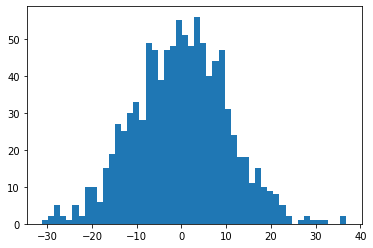

In [40]:
plt.hist(results['error'], 50, rwidth=500)

### <a name='a3'></a> Mean Absolute Error - Średni błąd bezwzględny
### $$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_{true} - y_{pred}|$$

In [43]:
def mean_absolute_error(y_true, y_pred):
   return abs(y_true-y_pred).sum() /len(y_true)

In [44]:
mean_absolute_error(y_true, y_pred)

8.288857705659687

In [45]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_pred)

8.288857705659687

### <a name='a4'></a> Mean Squared Error - MSE - Błąd średniokwadratowy
### $$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_{true} - y_{pred})^{2}$$

In [47]:
def mean_squared_error(y_true,y_pred):
  return ((y_true-y_pred)**2).sum()/len(y_true)

In [48]:
mean_squared_error(y_true,y_pred)

108.45063413878073

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true,y_pred)

108.45063413878073

### <a name='a5'></a> Root Mean Squared Error - RMSE - Pierwiastek błędu średniokwadratowego
### $$RMSE = \sqrt{MSE}$$

In [50]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(((y_true - y_pred) ** 2).sum() / len(y_true))

root_mean_squared_error(y_true, y_pred)

10.413963421233086

In [51]:
np.sqrt(mean_squared_error(y_true, y_pred))

10.413963421233086

### <a name='a6'></a>  Max Error - Błąd maksymalny

$$ME = max(|y\_true - y\_pred|)$$ 

In [52]:
def max_error(y_true, y_pred):
    return abs(y_true - y_pred).max()

In [53]:
max_error(y_true,y_pred)

36.88365291428444

In [54]:
from sklearn.metrics import max_error

max_error(y_true, y_pred)

36.88365291428444

### <a name='a7'></a>  R2 score - współczynnik determinacji
### $$R2\_score = 1 - \frac{\sum_{i=1}^{N}(y_{true} - y_{pred})^{2}}{\sum_{i=1}^{N}(y_{true} - \overline{y_{true}})^{2}}$$

In [55]:
from sklearn.metrics import r2_score

r2_score(y_true, y_pred)

0.7416817577294164

In [56]:
def r2_score(y_true, y_pred):
    numerator = ((y_true - y_pred) ** 2).sum()
    denominator = ((y_true - y_true.mean()) ** 2).sum()
    try:
        r2 = 1 - numerator / denominator
    except ZeroDivisionError:
        print('Dzielenie przez zero')
    return r2

In [57]:
r2_score(y_true, y_pred)

0.7416817577294164